# Cleaning Data: Missing Data and Dealing with Outliers

![Data Science Workflow](files/img/DSworkflow.png)

## Cleaning Data
- Understand the **data quality**
- **Improve** the quality (if possible)
- Dealing with **missing data** (both rows in single entries)
    - Examples include 
        - **Replacing** missing values/entries with mean values
        - **Interpolation** of values (in time series)
- Dealing with **data outliers**
    - Examples include 
        - Default missing values in system: sometimes as 0-values
        - Wrong values
- Removing **duplicates**
    - Common problem to have duplicate entries
- Process requires **domain knowledge**

## Missing Data
- Missing data is sometimes refered to as **NA** values in pandas.
- A great source to learn about is [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)


- Two types of missing data we consider
    1. NaN data
    2. Rows in time series data

Examples

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.DataFrame({'a':[np.nan,2,2],'b':[3,5,np.nan]})
df

,a,b
0,NaN,3.0
1,2.0,5.0
2,2.0,NaN


## Outliers
- Requires domain knowledge
- But typical examples could include

In [5]:
df = pd.DataFrame({'Weight (kg)': [86, 83, 0, 76, 109, 95, 0]})
df

,Weight (kg)
0,86
1,83
2,0
3,76
4,109
5,95
6,0


## Demonstration how it affects results
- [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course/overview)
- The dataset contains a training and testing dataset.
    - The goal is to predict prices on the testing dataset.
- We will explore how dealing with missing values impacts the prediction of a linear regression model

In [6]:
data=pd.read_csv('files/home-data/train.csv',index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.shape

(1460, 37)

### Remove non-numeric for this demonstration
```Python
data = data.select_dtypes(include='number')
```

Then we check of missing values.
```Python
data.info()
```

In [7]:
data=data.select_dtypes(include='number')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

In [10]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Helper function
- Implement a helper function to calculate the r-square score
- It should take independent features `X` and dependent feature `y`
- Then split that into training and testing sets.
- Fit the training set.
- Predict the test set.
- Return the r-square score

In [11]:
def regression_score(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    lin=LinearRegression()
    lin.fit(X_train,y_train)
    y_pred=lin.predict(X_test)
    return r2_score(y_pred,y_test)

### Calculations
- Try first to calcualte the r-square by using `data.dropna()`
    - This serves as the ussual way we have done it
- Then with `data.fillna(data.mean())`
    - [`fillna()`](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.fillna.html) Fill NA/NaN values using the specified method.
- Then with `data.fillna(data.mode().iloc[0])`

In [12]:
test_base=data.dropna()

In [13]:
regression_score(test_base.drop('SalePrice',axis=1),test_base[['SalePrice']])

0.6548289068325878

In [14]:
test_base = data.fillna(data.mean())

regression_score(test_base.drop('SalePrice', axis=1), test_base[['SalePrice']])

0.7439346373898539

In [12]:
data.mode()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,60.0,7200,5,5,2006,1950,0.0,0,0,...,0,0,0,0,0,0,0,6,2009,140000


In [16]:
test_base = data.fillna(data.mode().iloc[0])

regression_score(test_base.drop('SalePrice', axis=1), test_base[['SalePrice']])

0.7465420669734152

## Time series
- Now let's explore a time series: `files/weather.csv`


In [3]:
weather=pd.read_csv('files/weatherHistory.csv')


In [4]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
weather['Formatted Date']=weather['Formatted Date'].str[0:15]

In [7]:
weather.set_index('Formatted Date')

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.


In [8]:
weather["Formatted Date"] = pd.to_datetime(weather["Formatted Date"])

In [9]:
weather.dtypes

Formatted Date              datetime64[ns]
Summary                             object
Precip Type                         object
Temperature (C)                    float64
Apparent Temperature (C)           float64
Humidity                           float64
Wind Speed (km/h)                  float64
Wind Bearing (degrees)             float64
Visibility (km)                    float64
Loud Cover                         float64
Pressure (millibars)               float64
Daily Summary                       object
dtype: object

### Missing time series rows
- One way to find missing rows of data in a time series is as follows
```Python
idx = pd.Series(data=pd.date_range(start=df.index.min(), end=df.index.max(), freq="H"))
mask = idx.isin(df.index)
idx[~mask]
```

In [14]:
idx = pd.Series(data=pd.date_range(start=weather.index.min(), end=weather.index.max(), freq="H"))
display(idx)

0   1970-01-01
dtype: datetime64[ns]

In [40]:
mask = idx.isin(weather.index)

In [41]:
idx[~mask]

Series([], dtype: datetime64[ns])

### Insert missing datetimess and interpolate them
- To insert missing datetimes we can use [`reindex()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html)
- To interploate values that are missing [`interpolate`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [10]:
weather.interpolate()[weather['Summary'].isna()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


## Outliers
- If we focus on `Pressure (millibars)` for `2006'
- One way to handle 0-values is with [`replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)
```Python
.replace(0, np.nan)
```
- Then we can apply `interploate()`

In [8]:
weather[weather['Summary'].isna()]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [9]:
pressure = weather['Pressure (millibars)']

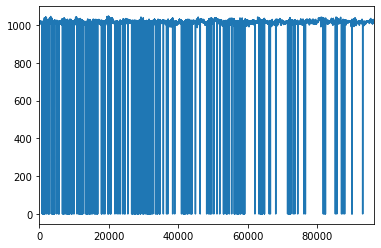

In [11]:
pressure.plot()

In [23]:
pressure.isna().any()

False

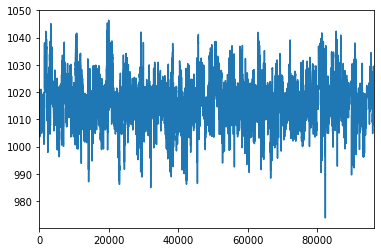

In [12]:
pressure.replace(0, np.nan).interpolate().plot()